In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [47]:
N = 1000
f1 = 11
f2 = 5
x = np.linspace(0,1,N)
trend = 20*x*x + 5*x + 10
sezon = np.sin(2*np.pi*f1*x) + np.sin(2*np.pi*f2*x)
variatii_mici = np.random.normal(size = N)


serie = trend+sezon+variatii_mici

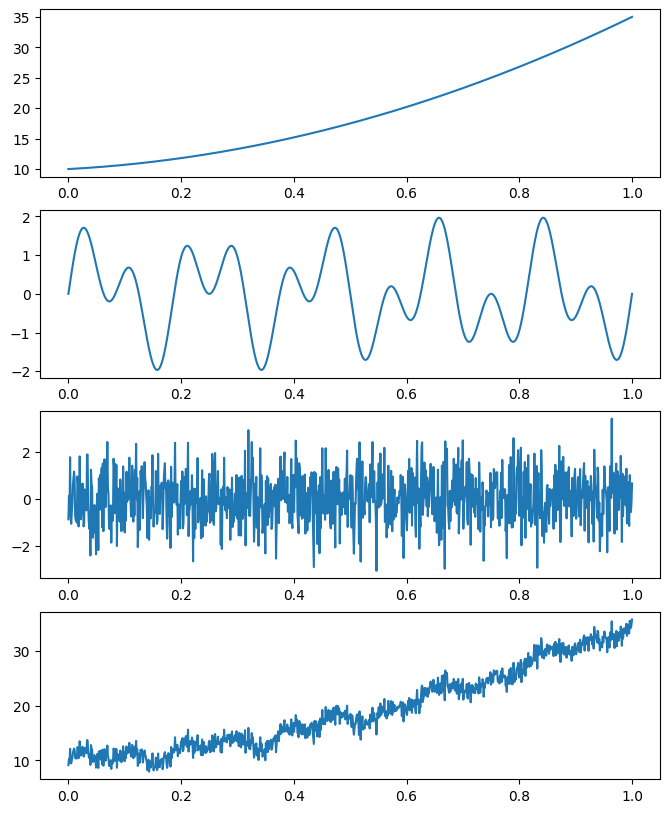

In [48]:
fig, axes = plt.subplots(4, 1, figsize=(8, 10))
axes[0].plot(x,trend)
axes[1].plot(x,sezon)
axes[2].plot(x,variatii_mici)
axes[3].plot(x,serie)